<a href="https://colab.research.google.com/github/sacefe/edgeTPU_Model_training/blob/main/CMPE297_Final_Project_Object_Detection_tflite_and_EdgeTpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - CMPE 297
#### **Authors**: 
* Sergio Aguilar 
* Achalaesh Lanka

#### **Project**:  
* Product defect detection 
* Perform Deep learning based object detection 

#### **Application focus**
* MVTec Anomaly Detection Dataset with our own PASCAL annotations
* Create TFRecords
* Transfer learning of a Tensorflow Models 
* Convert the Model to tflite 
* Convert the Model to EdgeTPU
* Utilize the on-board accelerator.
* add Gstreamer

# Generating TFRecords  (perform this step in Ubuntu)

The steps needed are:
1.   Installation 
2.   Gatherring data 
3.   Labeling data
4.   Generating TFRecords for training

Reference
* https://medium.com/analytics-vidhya/custom-object-detection-with-tensorflow-using-google-colab-7cbc484f83d7
* https://github.com/TheCaffeineDev/Tensorflow-Object-Detection-API-With-Custom-Dataset

###   Installation 
* install repo 
* anaconda for all packages
* create bonding box 
* cerate TF records

In [ ]:
# !git clone https://github.com/TheCaffeineDev/Tensorflow-Object-Detection-API-With-Custom-Dataset.git

This repo contains around 100 labeled images.

Directory structure. The directory structure should look like this:<br>
├── ...<br>
-  ├── data               
   ├── images <br>
   │   ├── train <br>
   │   ├── test <br>
   ├── utils<br>
   │	├── label_map_util.py <br>
   │	├── visualization_utils.py <br>
   ├── generate_tfrecord.py <br>
   └── object-detection.pbtxt <br>
   └── transform_image_resolution.py <br>
   └── xml_csv.py <br>
   └── webcam_inference.py <br>

### Replicate on this Colab  (this process is in Linux only)
clone repo: # !git clone https://github.com/TheCaffeineDev/Tensorflow-Object-Detection-API-With-Custom-Dataset.git


### Install dependencies (orders of dependencies is important)

In [ ]:
!pip install tensorflow-gpu
!pip install tensorflow

     |████████████████████████████████| 320.4MB 42kB/s 


In [ ]:
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk

!pip install -q Cython contextlib2 pillow lxml matplotlib

!pip install -q pycocotools


Selecting previously unselected package python-bs4.
(Reading database ... 144793 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-webencodings.
Preparing to unpack .../4-python-webencodings_0.5-2_all.deb ...
Unpacking python-webencodings (0.5-2) ...
Selecting previously unselected package python-html5lib.
Preparing to unpack .../5-python-html5lib_0.999999999-1_all.deb ...
Unpacking pyt

 ### Clone the Tensorflow models repository

In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 47907 (delta 21), reused 31 (delta 2), pack-reused 47853
Receiving objects: 100% (47907/47907), 552.00 MiB | 29.67 MiB/s, done.
Resolving deltas: 100% (32989/32989), done.


### Setting up the environment

In [ ]:
%cd models/research

/content/models/research


Protobuf Compilation<br>
The Tensorflow Object Detection API uses Protobufs to configure model and training parameters. Before the framework can be used, the Protobuf libraries must be compiled. This should be done by running the following command from the tensorflow/models/research/ directory:

In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

Add Libraries to PYTHONPATH<br>
When running locally, the tensorflow/models/research/ and slim directories should be appended to PYTHONPATH. This can be done by running the following from tensorflow/models/research/:

In [ ]:
# From tensorflow/models/research/
# export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim
#from models
# export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/research:`pwd`/research/slim

import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'
os.environ['PYTHONPATH'] += ":/content/models"
# import sys
# sys.path.append("/content/models")

Object Detection Installation.. From tensorflow/models/research/

In [ ]:
# From tensorflow/models/research/
!python /content/models/research/slim/setup.py install 

Testing the Installation <br>
You can test that you have correctly installed the Tensorflow Object Detection API by running the following command:

In [ ]:
!python object_detection/builders/model_builder_test.py

2020-12-02 21:18:06.815675: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


### Gathering data
Upload a zip files with images

Labeling data
install LabelImg by

In [ ]:
!pip install labelImg

     |████████████████████████████████| 245kB 14.4MB/s 
     |████████████████████████████████| 68.3MB 80kB/s 
     |████████████████████████████████| 286kB 59.2MB/s 
  Created wheel for labelImg: filename=labelImg-1.8.4-py2.py3-none-any.whl size=252334 sha256=c21f6609d382dc667af1c10d080a11fd407624127758aaa9136ff42676bea217
  Stored in directory: /root/.cache/pip/wheels/e4/e2/d0/30a175ab78b66f65730f1ee96f1358b2e8211fb95603b3ab8e
Successfully built labelImg


LabelImg is a graphical image annotation tool.
After installing labelImg open it by typing

In [ ]:
!labelImg

/bin/bash: labelImg: command not found


# Training using our own TFrecords


## Load code requirements

In [ ]:
%tensorflow_version 1.x
!pip install tf_slim
!pip show tensorflow

TensorFlow 1.x selected.
     |████████████████████████████████| 358kB 8.0MB/s 
Name: tensorflow
Version: 1.15.2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /tensorflow-1.15.2/python3.6
Requires: keras-applications, tensorflow-estimator, protobuf, wheel, six, astor, grpcio, tensorboard, wrapt, google-pasta, absl-py, gast, numpy, termcolor, opt-einsum, keras-preprocessing
Required-by: stable-baselines, magenta, fancyimpute


In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Sat Dec  5 07:10:18 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Tensorflow  models  to be trained

In [ ]:
# Install protobuf-compiler and the tensorflow's object detection API.
!apt-get install protobuf-compiler
!git clone https://github.com/tensorflow/models.git

import os
os.environ['PYTHONPATH'] += ':/content/models/research/'
os.environ['PYTHONPATH'] += ':/content/models/research/slim/'
os.environ['PYTHONPATH'] += ':/content/models/research/object_detection/utils/'
os.environ['PYTHONPATH'] += ':/content/models/research/object_detection'

%cd models/research
# Compile all the protobuf dependencies.
!protoc object_detection/protos/*.proto --python_out=.
# Set up and install the object detection API.
!cp object_detection/packages/tf1/setup.py .
!python -m pip install .
# Run a test to make sure setup is correct.
!python object_detection/builders/model_builder_test.py

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
Cloning into 'models'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 48117 (delta 38), reused 64 (delta 5), pack-reused 48020
Receiving objects: 100% (48117/48117), 552.16 MiB | 40.78 MiB/s, done.
Resolving deltas: 100% (33140/33140), done.
/content/models/research
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1606765 sha256=021bb1bb251123b73b9b137e95d457b7f6f451a77a1c3d1f1b891932df179ee4
  Stored in directory: /tmp/pip-ephem-wheel-cache-nznnirt7/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
Successfully built object-detection


## Load dataset & use the tfrecord created in Ubuntu

In [ ]:
!rm -rf /content/dataset  x`
%cd /content
!git clone https://github.com/sacefe/edgeTPU_Model_training.git
%mkdir /content/dataset
%mv  /content/edgeTPU_Model_training/TFrecords_12042020/* /content/dataset
!rm -rf /content/edgeTPU_Model_training 

/bin/bash: -c: line 0: unexpected EOF while looking for matching ``'
/bin/bash: -c: line 1: syntax error: unexpected end of file
/content
Cloning into 'edgeTPU_Model_training'...
remote: Enumerating objects: 1550, done.
remote: Total 1550 (delta 0), reused 0 (delta 0), pack-reused 1550
Receiving objects: 100% (1550/1550), 312.77 MiB | 50.76 MiB/s, done.
Resolving deltas: 100% (501/501), done.


## Define the model & Pipeline 
sdlite mobile detection 320 x 320 
Must be compatible with coral EdgeTPU 

In [ ]:
# Now let's download our ssdlite mobiledet pretrained model from tensorflow's model zoo.
!mkdir /content/pretrained_model
%cd /content/pretrained_model
!wget http://download.tensorflow.org/models/object_detection/ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19.tar.gz
# !wget http://download.tensorflow.org/models/object_detection/ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19.tar.gz
!tar xvf ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19.tar.gz

/content/pretrained_model
--2020-12-05 07:11:00--  http://download.tensorflow.org/models/object_detection/ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.98.128, 2607:f8b0:400e:c06::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.98.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156413934 (149M) [application/x-tar]
Saving to: ‘ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19.tar.gz’

ssdlite_mobiledet_e 100%[===================>] 149.17M   125MB/s    in 1.2s    

2020-12-05 07:11:02 (125 MB/s) - ‘ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19.tar.gz’ saved [156413934/156413934]

ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19/
ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19/fp32/
ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19/fp32/model.ckpt-400000.data-00000-of-00001
ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19/fp32/model.ckpt-400000.

In [ ]:
# Edit Pipeline config to load in our new tfrecord that we just created and add quantization aware training.
import tensorflow as tf
from google.protobuf import text_format
from object_detection.protos import pipeline_pb2

# Hack to find out if you have colab pro or not :)
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
print(gpu_info)
gpu_name = !nvidia-smi --query-gpu=gpu_name --format=csv
# You get Tesla T4 with free colab and Tesla P100-PCIe with colab pro.
colab_pro = False if 'T4' in gpu_name else True

pipeline = pipeline_pb2.TrainEvalPipelineConfig()                                                                                                                                                                                                          
config_path = '/content/models/research/object_detection/samples/configs/ssdlite_mobiledet_edgetpu_320x320_coco_sync_4x4.config'
with tf.gfile.GFile(config_path, "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline)

pipeline.train_input_reader.tf_record_input_reader.input_path[:] = ['/content/dataset/screws_train-????-0006.record']
pipeline.train_input_reader.label_map_path = '/content/dataset/object_detection.pbtxt'
pipeline.eval_input_reader[0].tf_record_input_reader.input_path[:] = ['/content/dataset/screws_test-????-0006.record']
pipeline.eval_input_reader[0].label_map_path = '/content/dataset/object_detection.pbtxt'
pipeline.train_config.fine_tune_checkpoint = '/content/pretrained_model/ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19/fp32/model.ckpt'
pipeline.train_config.batch_size = 64 if colab_pro else 32 # Smaller batch size on free gpu to avoid OOM Killer
pipeline.train_config.num_steps = 25000 #25000 if colab_pro else 10000 # Less steps with free gpu but 10k should be good enough
# pipeline.train_config.num_steps = 200 #25000 if colab_pro else 10000 # Less steps with free gpu but 10k should be good enough
# pipeline.model.ssd.num_classes = 37
pipeline.model.ssd.num_classes = 6

# Enable ssdlite, this should already be enabled in the config we downloaded, but this is just to make sure.
pipeline.model.ssd.box_predictor.convolutional_box_predictor.kernel_size = 3
pipeline.model.ssd.box_predictor.convolutional_box_predictor.use_depthwise = True
pipeline.model.ssd.feature_extractor.use_depthwise = True
# Quantization Aware Training
pipeline.graph_rewriter.quantization.delay = 0
pipeline.graph_rewriter.quantization.weight_bits = 8
pipeline.graph_rewriter.quantization.activation_bits = 8

config_text = text_format.MessageToString(pipeline)                                                                                                                                                                                                        
with tf.gfile.Open(config_path, "wb") as f:                                                                                                                                                                                                                       
    f.write(config_text)

# This is out config after modifying.
!cat /content/models/research/object_detection/samples/configs/ssdlite_mobiledet_edgetpu_320x320_coco_sync_4x4.config

Sat Dec  5 07:11:06 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Train our models

In [ ]:
# Before we start training, let's start tensorboard so we can track the progress.
# More info on tensorflow can be found here: https://www.tensorflow.org/tutorials
%cd /content
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip

/content
--2020-12-05 07:11:56--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.196.106.64, 35.153.20.238, 52.6.49.248, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.196.106.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  18.2MB/s    in 0.7s    

2020-12-05 07:11:57 (18.2 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
# Starts tensorboard, so we can monitor the training process.
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format('/content/train')
)
get_ipython().system_raw('./ngrok http 6006 &')
print('Click on link below to track progress:')
import time
time.sleep(1)
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Click on link below to track progress:
http://d15324e3d6fa.ngrok.io


In [ ]:
# Let's begin training, expects to take a few hours, time for a good stretch :)
%cd /content/models/research/
!python3 object_detection/model_main.py \
    --logtostderr=true \
    --model_dir=/content/train \
    --pipeline_config_path=/content/models/research/object_detection/samples/configs/ssdlite_mobiledet_edgetpu_320x320_coco_sync_4x4.config

Streaming output truncated to the last 5000 lines.
I1205 14:13:49.673761 139957638875008 quantize.py:299] Skipping quant after FeatureExtractor/MobileDetEdgeTPU/TuckerConv/Conv/add_fold
INFO:tensorflow:Skipping quant after FeatureExtractor/MobileDetEdgeTPU/TuckerConv/Conv_1/add_fold
I1205 14:13:49.673901 139957638875008 quantize.py:299] Skipping quant after FeatureExtractor/MobileDetEdgeTPU/TuckerConv/Conv_1/add_fold
INFO:tensorflow:Skipping quant after FeatureExtractor/MobileDetEdgeTPU/FusedConv/Conv/add_fold
I1205 14:13:49.674113 139957638875008 quantize.py:299] Skipping quant after FeatureExtractor/MobileDetEdgeTPU/FusedConv/Conv/add_fold
INFO:tensorflow:Skipping quant after FeatureExtractor/MobileDetEdgeTPU/FusedConv_1/Conv/add_fold
I1205 14:13:49.674333 139957638875008 quantize.py:299] Skipping quant after FeatureExtractor/MobileDetEdgeTPU/FusedConv_1/Conv/add_fold
INFO:tensorflow:Skipping quant after FeatureExtractor/MobileDetEdgeTPU/FusedConv_2/Conv/add_fold
I1205 14:13:49.67455

In [ ]:
# Make inference graph.
!python3 /content/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path=/content/models/research/object_detection/samples/configs/ssdlite_mobiledet_edgetpu_320x320_coco_sync_4x4.config \
    --output_directory=/content/inference_graph \
    --trained_checkpoint_prefix=/content/train/model.ckpt-25000 # Make sure to change this checkpoint to the corresponding num step you set from above.
    # --trained_checkpoint_prefix=/content/train/model.ckpt-200 # Make sure to change this checkpoint to the corresponding num step you set from above.


Instructions for updating:
Please use `layer.__call__` method instead.
W1205 17:17:18.463726 140171756193664 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I1205 17:17:20.422196 140171756193664 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I1205 17:17:20.498055 140171756193664 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I1205 17:17:20.572402 140171756193664 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv befo

In [ ]:
# Let's copy some imges for validation 
!rm -rf /content/test 
!mkdir /content/test
!cd /content/test
!cp /content/dataset/Test/test_good_images/000.jpg  /content/test
!cp /content/dataset/Test/test_good_images/001.jpg  /content/test
!cp /content/dataset/Test/test_good_images/002.jpg  /content/test
!cp /content/dataset/Defects/manipulated_front_images/003.jpg /content/test
!cp /content/dataset/Defects/manipulated_front_images/004.jpg /content/test
!cp /content/dataset/Defects/scratch_head_images/005.jpg /content/test
!cp /content/dataset/Defects/scratch_head_images/006.jpg /content/test
!cp /content/dataset/Defects/scratch_neck_images/007.jpg /content/test
!cp /content/dataset/Defects/scratch_neck_images/008.jpg /content/test
!cp /content/dataset/Defects/thread_side_images/009.jpg /content/test
!cp /content/dataset/Defects/thread_side_images/010.jpg /content/test
!cp /content/dataset/Defects/thread_top_images/011.jpg /content/test
!cp /content/dataset/Defects/thread_top_images/012.jpg /content/test

Evaluating: /content/test/000.jpg
Evaluating: /content/test/001.jpg
Evaluating: /content/test/002.jpg
Evaluating: /content/test/003.jpg
Evaluating: /content/test/004.jpg
Evaluating: /content/test/005.jpg
Evaluating: /content/test/006.jpg
Evaluating: /content/test/007.jpg
Evaluating: /content/test/008.jpg
Evaluating: /content/test/009.jpg


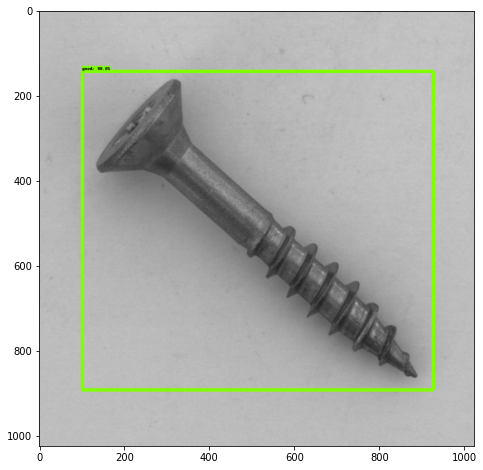

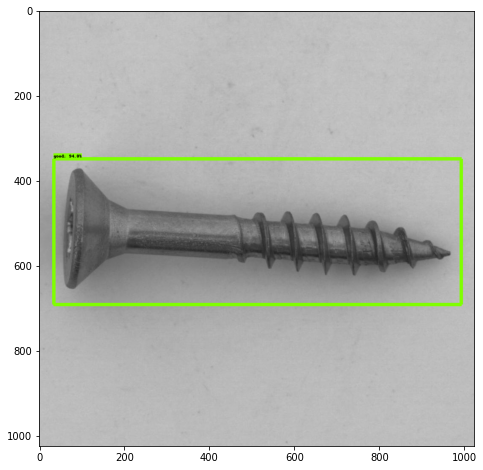

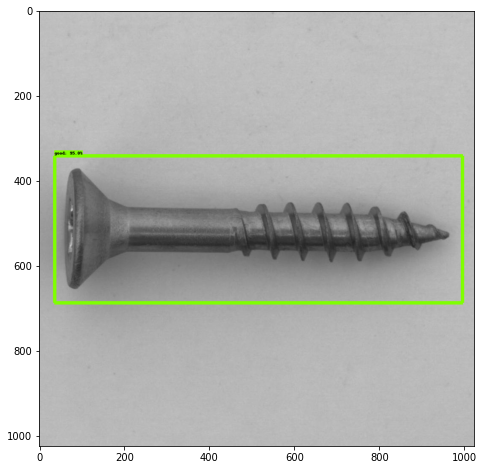

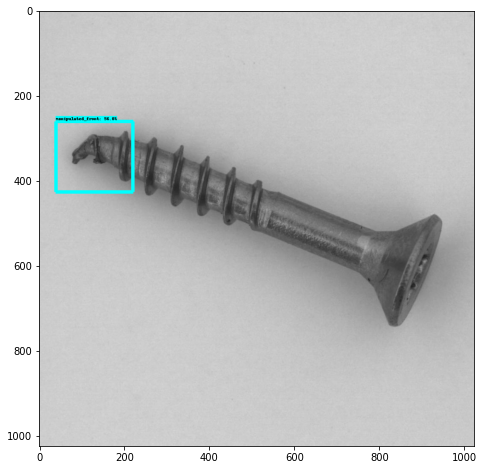

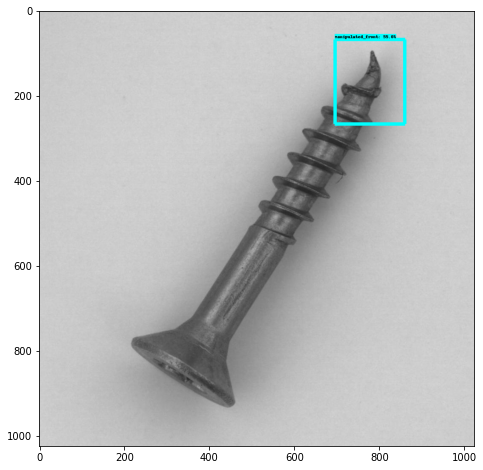

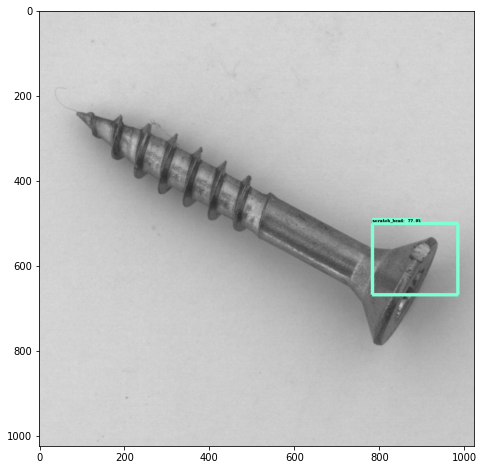

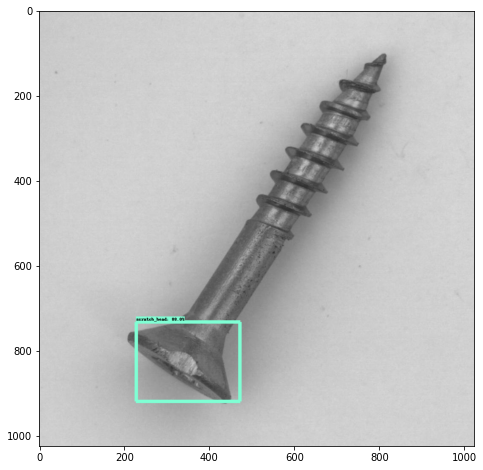

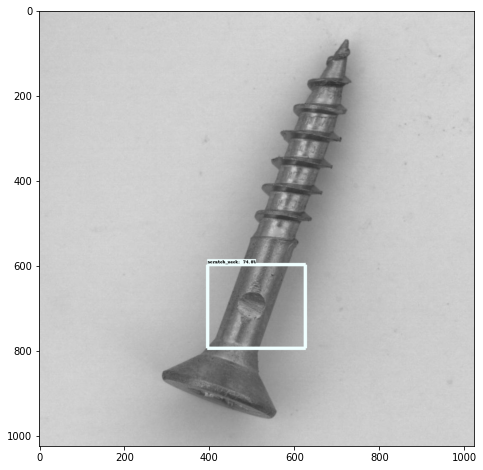

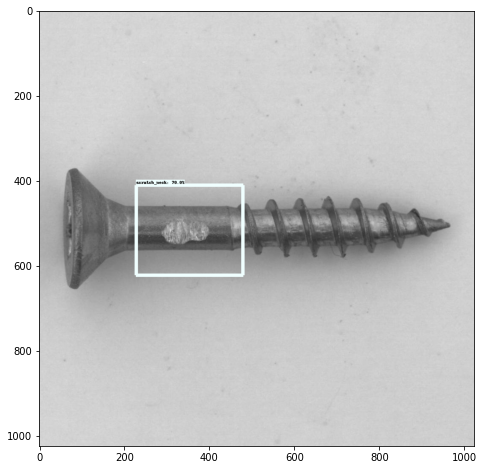

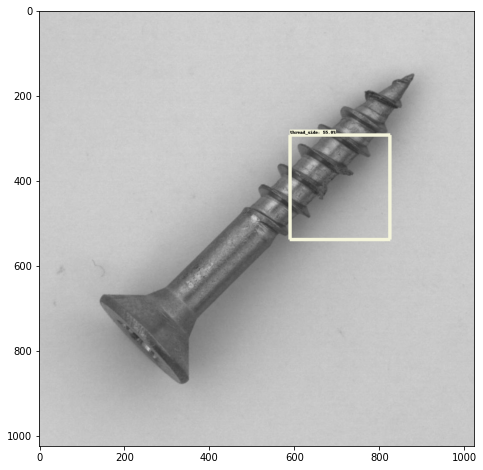

In [ ]:
# Do a Quick Evaluation on the inference graph model.
import numpy as np
import os
import sys
import tensorflow as tf

from collections import defaultdict
from matplotlib import pyplot as plt
from PIL import Image

from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
%matplotlib inline

# Initialize tf.Graph()
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile('/content/inference_graph/frozen_inference_graph.pb', 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

# Loads labels
label_map = label_map_util.load_labelmap('/content/dataset/object_detection.pbtxt')
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=6, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


# Run Inference and populates results in a dict.
def run_inference(graph, image):
  with graph.as_default():
    with tf.Session() as sess:
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = [output.name for op in ops for output in op.outputs]
      tensor_dict = {}
      tensor_keys = ['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes']
      for key in tensor_keys:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(tensor_name)
      
      # Actual inference.
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')
      output_dict = sess.run(tensor_dict, feed_dict={image_tensor: np.expand_dims(image, 0)})

      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict['detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
  return output_dict


# test_image_path = [os.path.join('/content/test', 'image{}.jpg'.format(i)) for i in range(1, 6)]
test_image_path = [os.path.join('/content/test', '00{}.jpg'.format(i)) for i in range(0, 10)]
for image_path in test_image_path:
  print('Evaluating:', image_path)
  image = Image.open(image_path)
  img_width, img_height = image.size
  # if image.format == "PNG":
  image = image.convert('RGB')
  image_np = np.array(image.getdata()).reshape((img_height, img_width, 3)).astype(np.uint8)
  # Run inference.
  output_dict = run_inference(detection_graph, image_np)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=(12, 8))
  plt.imshow(image_np)

In [ ]:
# !rm  /content/test/*

In [ ]:
# Now we export this model to tflite_graph format.
%cd /content/models/research
!mkdir /content/output_model
!python3 object_detection/export_tflite_ssd_graph.py \
  --pipeline_config_path=/content/models/research/object_detection/samples/configs/ssdlite_mobiledet_edgetpu_320x320_coco_sync_4x4.config \
  --trained_checkpoint_prefix=/content/train/model.ckpt-25000 \
  --output_directory=/content/output_model \
  --add_postprocessing_op=true
# Make sure to change the model-ckpt-# to match the checkpoint number you used.

/content/models/research
Instructions for updating:
Please use `layer.__call__` method instead.
W1205 17:18:12.974221 140674494142336 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I1205 17:18:14.921428 140674494142336 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I1205 17:18:14.990633 140674494142336 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I1205 17:18:15.058489 140674494142336 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:dept

## Convert the model to tflite

In [ ]:
# Now we can convert this custom trained model to a CPU tflite model
# --output_file="/content/output_model/ssdlite_mobiledet_dog_vs_cat.tflite" \
!tflite_convert \
  --output_file="/content/output_model/ssdlite_mobiledet_screws.tflite" \
  --graph_def_file="/content/output_model/tflite_graph.pb" \
  --inference_type=QUANTIZED_UINT8 \
  --input_arrays="normalized_input_image_tensor" \
  --output_arrays="TFLite_Detection_PostProcess,TFLite_Detection_PostProcess:1,TFLite_Detection_PostProcess:2,TFLite_Detection_PostProcess:3" \
  --mean_values=128 \
  --std_dev_values=128 \
  --input_shapes=1,320,320,3 \
  --allow_custom_ops

2020-12-05 17:18:23.830654: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-12-05 17:18:23.832759: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-12-05 17:18:23.833232: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:04.0
2020-12-05 17:18:23.833438: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-12-05 17:18:23.835215: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-12-05 17:18:23.836780: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuf

In [ ]:
# Install tflite_runtime package to evaluate the model.
!pip3 install https://github.com/google-coral/pycoral/releases/download/release-frogfish/tflite_runtime-2.5.0-cp36-cp36m-linux_x86_64.whl  

     |████████████████████████████████| 1.3MB 766kB/s 


Evaluating: /content/test/001.jpg


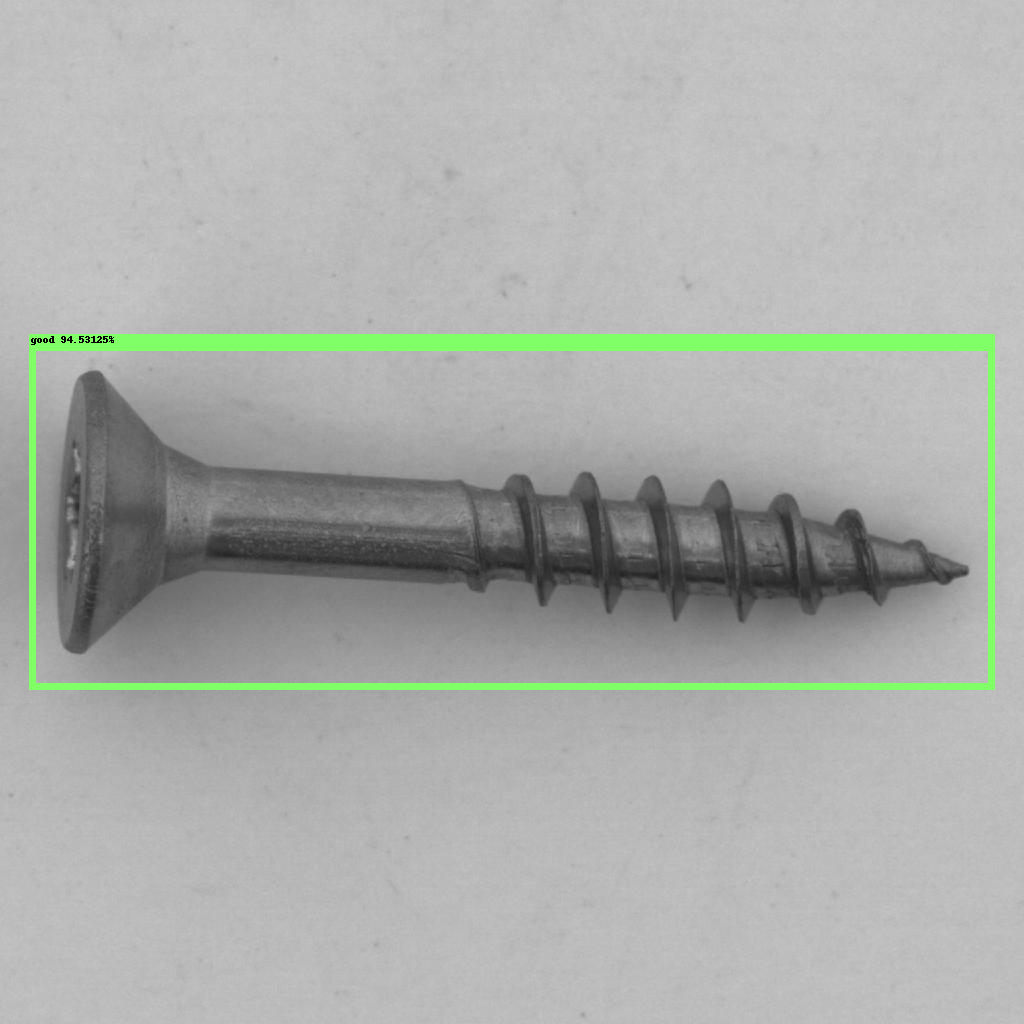

Evaluating: /content/test/002.jpg


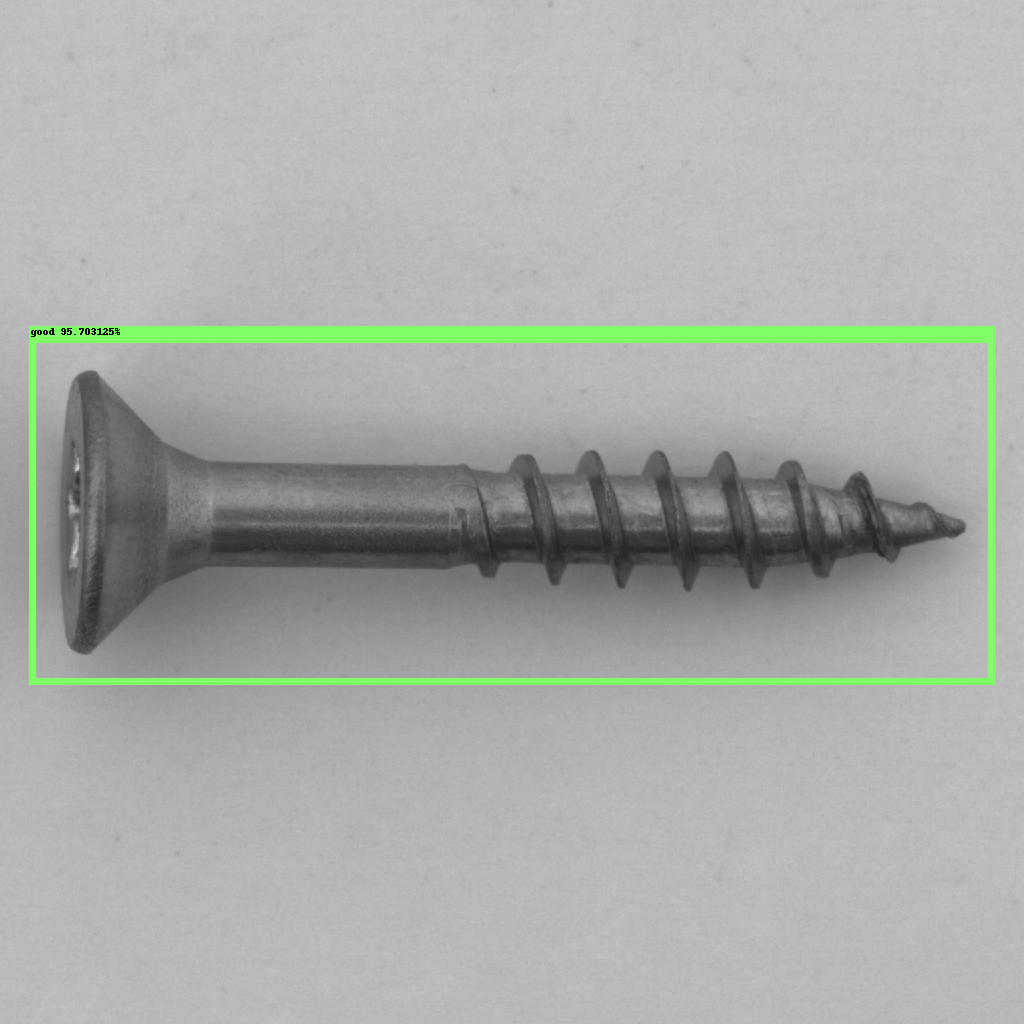

Evaluating: /content/test/003.jpg


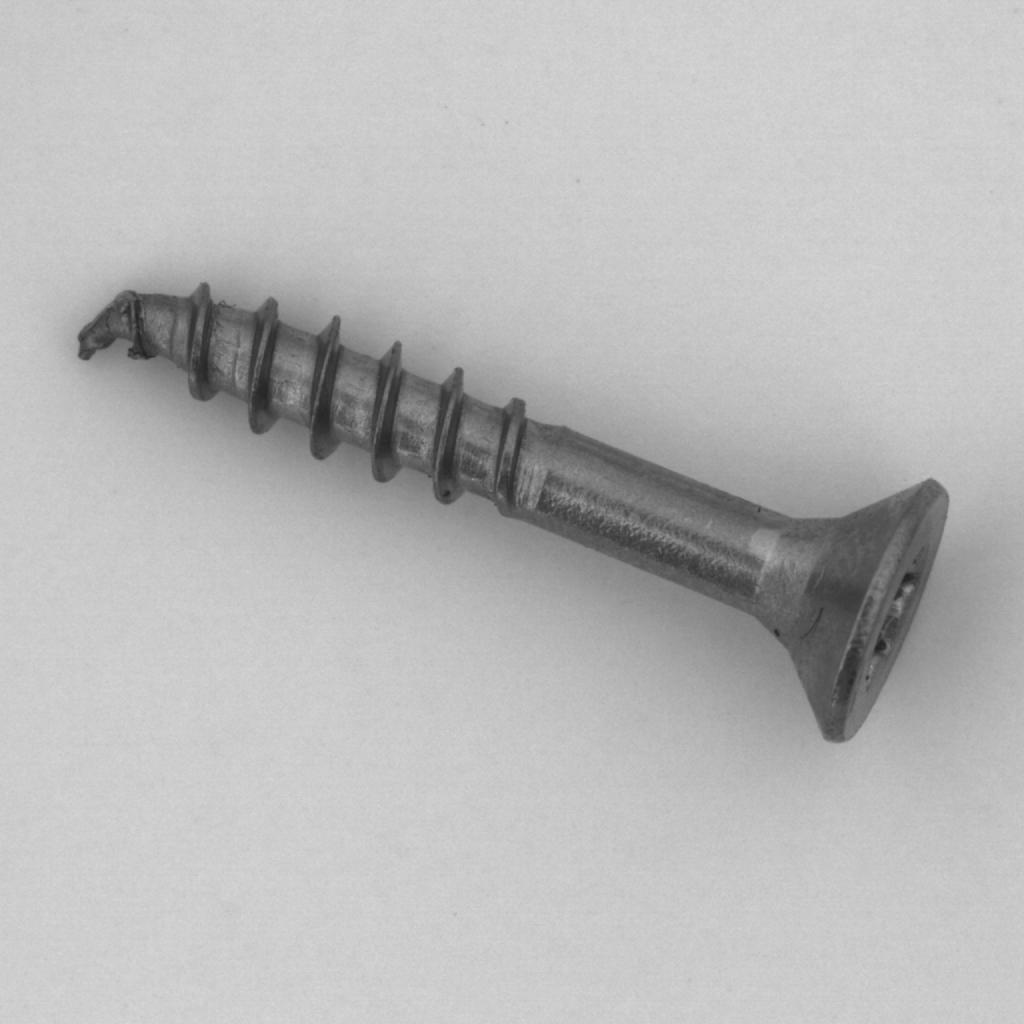

Evaluating: /content/test/004.jpg


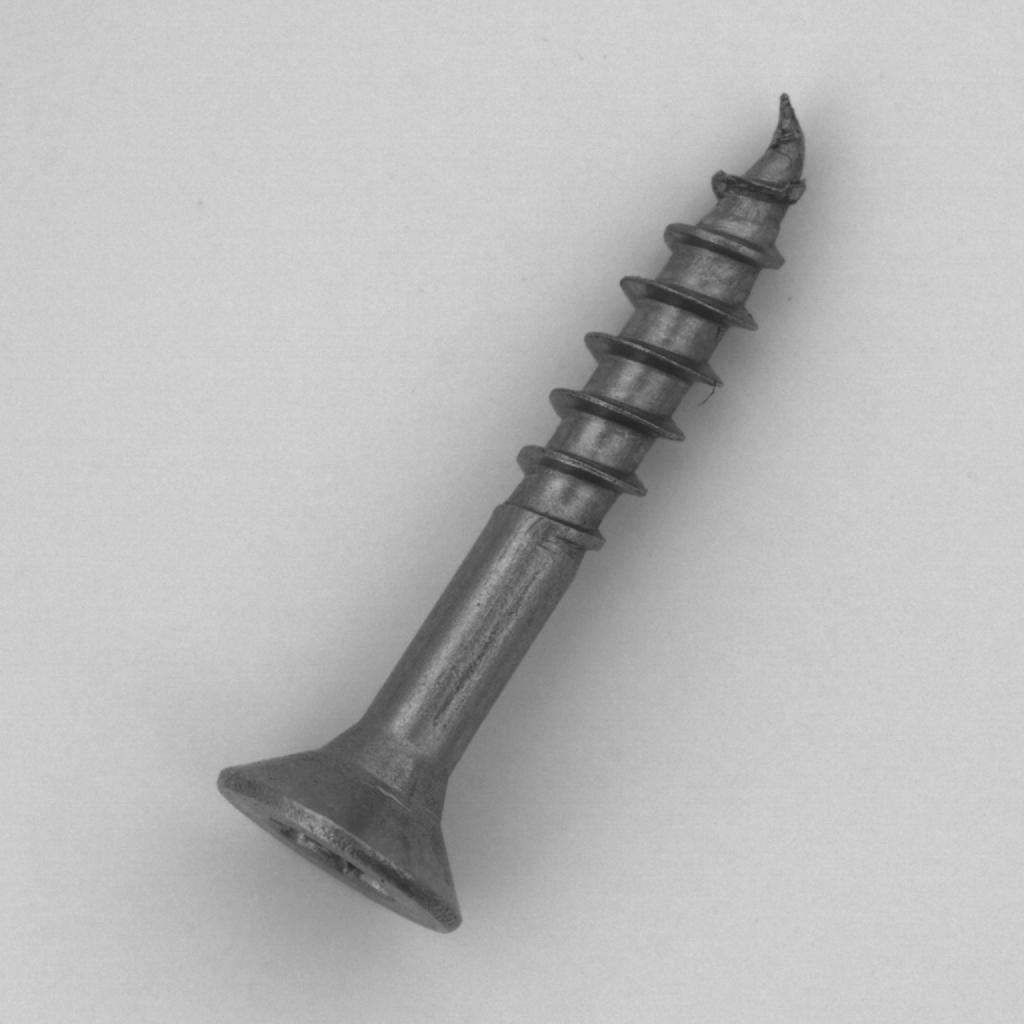

Evaluating: /content/test/005.jpg


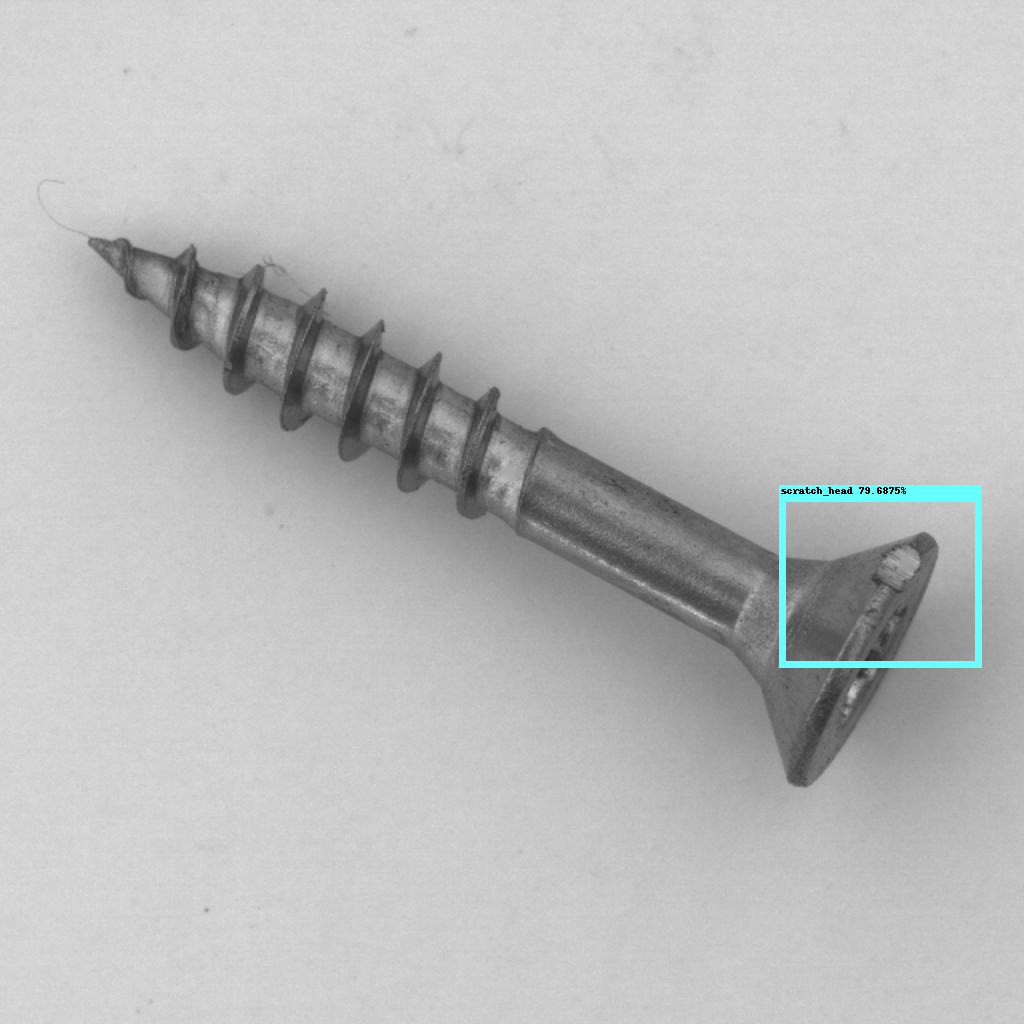

Evaluating: /content/test/006.jpg


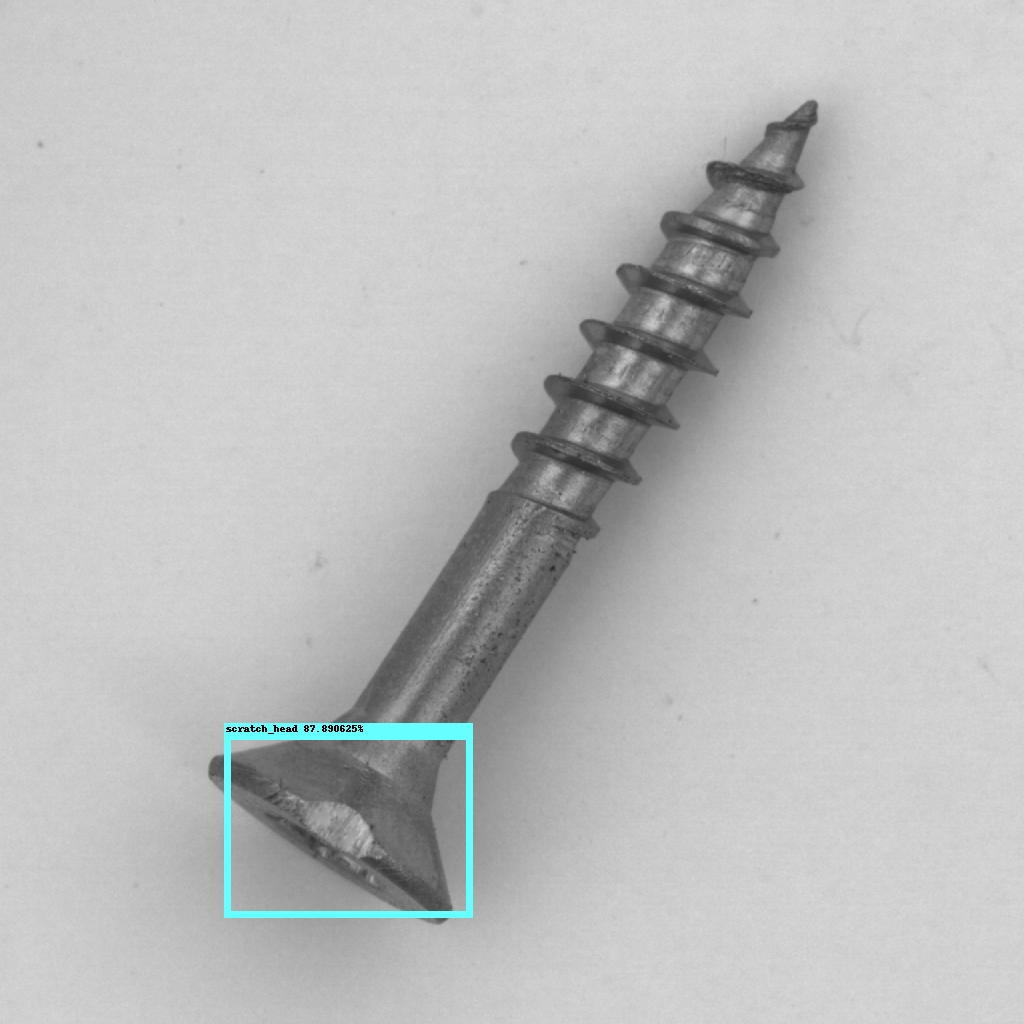

Evaluating: /content/test/007.jpg


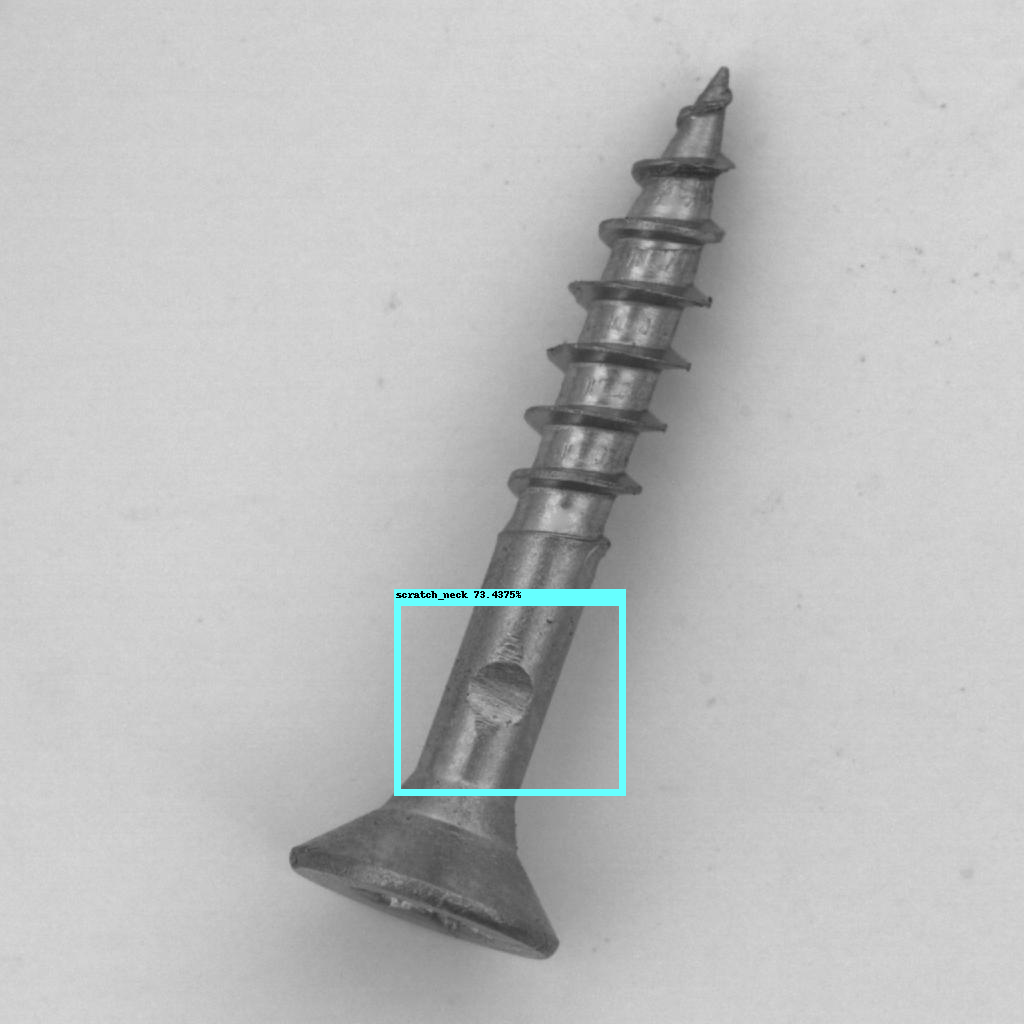

Evaluating: /content/test/008.jpg


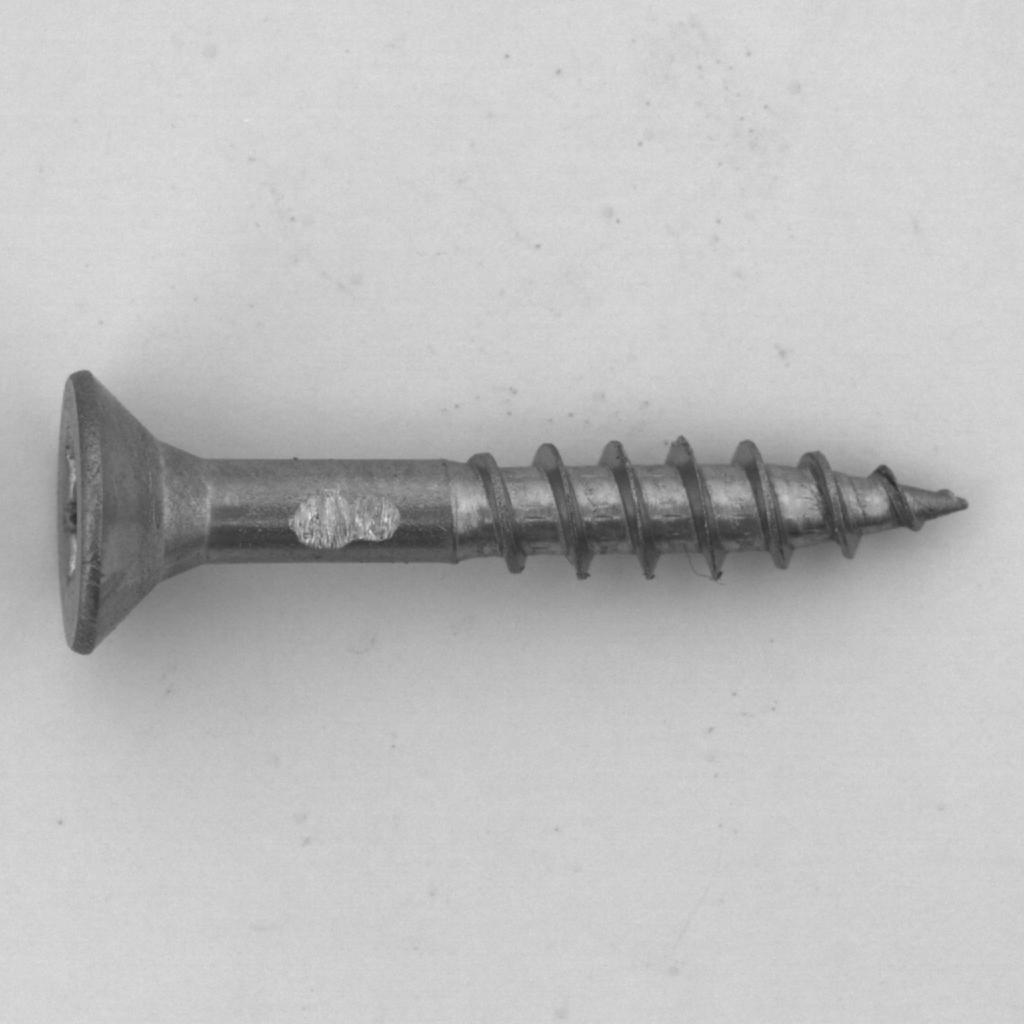

Evaluating: /content/test/009.jpg


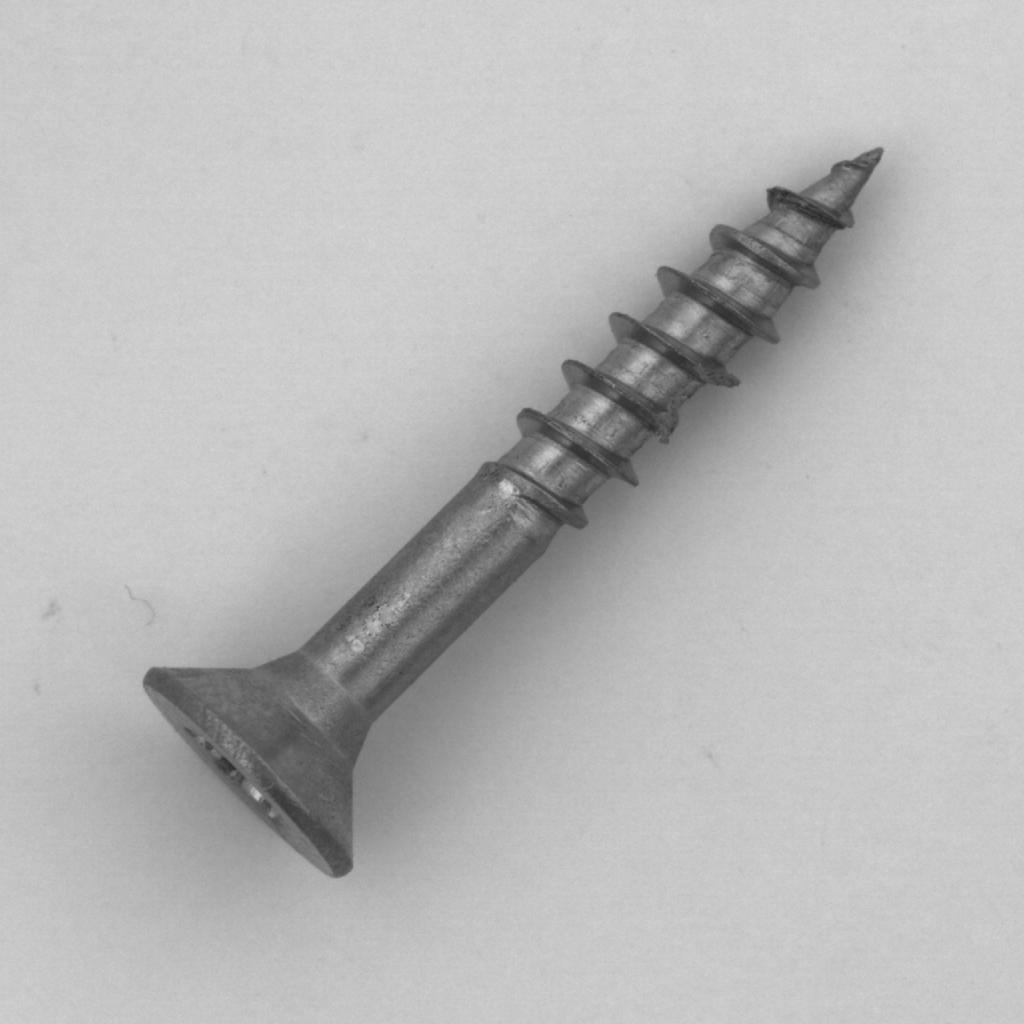

In [ ]:
# Now we do evaluation on the tflite model.
import os
import numpy as np
from tflite_runtime.interpreter import Interpreter
from tflite_runtime.interpreter import load_delegate
from PIL import Image
from PIL import ImageDraw
%matplotlib inline

# Creates tflite interpreter
# interpreter = Interpreter('/content/output_model/ssdlite_mobiledet_dog_vs_cat.tflite')
interpreter = Interpreter('/content/output_model/ssdlite_mobiledet_screws.tflite')

# This exact code can be used to run inference on the edgetpu by simply creating 
# the instantialize the interpreter with libedgetpu delegates:
# interpreter = Interpreter(args.model, experimental_delegates=[load_delegate('libedgetpu.so.1.0')])
interpreter.allocate_tensors()
interpreter.invoke() # warmup
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
width = input_details[0]['shape'][2]
height = input_details[0]['shape'][1]

def run_inference(interpreter, image):
  interpreter.set_tensor(input_details[0]['index'], image)
  interpreter.invoke()
  boxes = interpreter.get_tensor(output_details[0]['index'])[0]
  classes = interpreter.get_tensor(output_details[1]['index'])[0]
  scores = interpreter.get_tensor(output_details[2]['index'])[0]
  # num_detections = interpreter.get_tensor(output_details[3]['index'])[0]
  return boxes, classes, scores

# test_image_paths = [os.path.join('/content/test', 'image{}.jpg'.format(i)) for i in range(1, 6)]
test_image_paths = [os.path.join('/content/test', '00{}.jpg'.format(i)) for i in range(1, 10)]
for image_path in test_image_paths:
  print('Evaluating:', image_path)
  image = Image.open(image_path)
  image_width, image_height = image.size
  draw = ImageDraw.Draw(image)
  resized_image = image.resize((width, height))
  np_image = np.asarray(resized_image)
  input_tensor = np.expand_dims(np_image, axis=0)
  # Run inference
  boxes, classes, scores = run_inference(interpreter, input_tensor)
  # Draw results on image
  colors = {1:(128, 255, 102), 2:(102, 255, 255), 3:(102, 255, 255), 4:(102, 255, 255), 5:(102, 255, 255), 6:(102, 255, 255)}
  labels = {1:'good', 2:'manipulated_front', 3:'scratch_head', 4:'scratch_neck', 5:'thread_side', 6:'thread_top'}
  
  for i in range(len(boxes)):
    if scores[i] > .7:
      ymin = int(max(1, (boxes[i][0] * image_height)))
      xmin = int(max(1, (boxes[i][1] * image_width)))
      ymax = int(min(image_height, (boxes[i][2] * image_height)))
      xmax = int(min(image_width, (boxes[i][3] * image_width)))
      # draw.rectangle((xmin, ymin, xmax, ymax), width=7, outline=colors[int(classes[i])])
      draw.rectangle((xmin, ymin, xmax, ymax), width=7, outline=colors[int(classes[i]) + 1])
      # draw.rectangle((xmin, ymin, xmax, ymin-10), fill=colors[int(classes[i])])
      draw.rectangle((xmin, ymin, xmax, ymin-10), fill=colors[int(classes[i]) + 1])
      # text = labels[int(classes[i])] + ' ' + str(scores[i]*100) + '%'
      text = labels[int(classes[i]) + 1] + ' ' + str(scores[i]*100) + '%'
      draw.text((xmin+2, ymin-10), text, fill=(0,0,0), width=2)
  display(image)

## Compile for the Edge TPU
Finally, we're ready to compile the model for the Edge TPU.

First download the Edge TPU Compiler

In [ ]:
# Install the edgetpu compiler.
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!echo "deb https://packages.cloud.google.com/apt coral-edgetpu-stable main" | sudo tee /etc/apt/sources.list.d/coral-edgetpu.list
!sudo apt-get update
!sudo apt-get install edgetpu-compiler

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1974  100  1974    0     0   101k      0 --:--:-- --:--:-- --:--:--  101k
OK
deb https://packages.cloud.google.com/apt coral-edgetpu-stable main
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]

In [ ]:
# Compile our model and make a tarball of the finished trained model.
%cd /content/output_model
# !edgetpu_compiler -s ssdlite_mobiledet_dog_vs_cat.tflite
!edgetpu_compiler -s ssdlite_mobiledet_screws.tflite

%cd /content/
# Copy the checkpoints, inference graph, pipeline config, and the tflite models.
!cp -r /content/train/model.ckpt-10000* /content/output_model
!cp -r /content/inference_graph/* /content/output_model
# !tar cvf ssdlite_mobiledet_dog_vs_cat.tar.gz output_model
!tar cvf ssdlite_mobiledet_screws.tar.gz output_model

/content/output_model
Edge TPU Compiler version 15.0.340273435

Model compiled successfully in 927 ms.

Input model: ssdlite_mobiledet_screws.tflite
Input size: 3.31MiB
Output model: ssdlite_mobiledet_screws_edgetpu.tflite
Output size: 4.30MiB
On-chip memory used for caching model parameters: 4.11MiB
On-chip memory remaining for caching model parameters: 3.52MiB
Off-chip memory used for streaming uncached model parameters: 0.00B
Number of Edge TPU subgraphs: 1
Total number of operations: 125
Operation log: ssdlite_mobiledet_screws_edgetpu.log

Model successfully compiled but not all operations are supported by the Edge TPU. A percentage of the model will instead run on the CPU, which is slower. If possible, consider updating your model to use only operations supported by the Edge TPU. For details, visit g.co/coral/model-reqs.
Number of operations that will run on Edge TPU: 124
Number of operations that will run on CPU: 1

Operator                       Count      Status

CONV_2D       

## Download the EdgeTPU model

In [ ]:
# Download model and you're done!
from google.colab import files
# files.download('/content/ssdlite_mobiledet_dog_vs_cat.tar.gz')
files.download('/content/ssdlite_mobiledet_screws.tar.gz')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Download models directly

from google.colab import files

# files.download('/content/output_model/ssdlite_mobiledet_dog_vs_cat_edgetpu.tflite')
# files.download('/content/output_model/ssdlite_mobiledet_dog_vs_cat.tflite')

files.download('/content/output_model/ssdlite_mobiledet_screws_edgetpu.tflite')
files.download('/content/output_model/ssdlite_mobiledet_screws.tflite')

# files.download('cmpe2973_dogs_labels.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>